In [1]:
import numpy as np
import numpy.random as nrand
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
rcParams_dict = {
    'xtick.bottom': True,
    'patch.edgecolor':'k',
    'patch.force_edgecolor': True,
    'font.size': 15,
    'pdf.fonttype':42,
    'font.family':'Arial',
    'mathtext.fontset':'custom',
    'mathtext.default': 'regular',
    'mathtext.it': 'Arial:italic',
    'mathtext.it': 'Arial:italic',
}
mpl.rcParams.update(rcParams_dict)

In [22]:
# fG standard model, N generation w1 = 5/6 then N generation w2 = 6/5
N = 1000
w2 = 1.2
w1 = 1/w2
N_m_ini = 500
N_m_list_list = []
N_removed = 0
for N_steps in range(1,8):
    N_m_list = []
    i = 0
    while i < 500000:
        N_m = N_m_ini
        for j in range(N_steps):
            p_ = N_m/N
            P_ = p_*w1/(1+p_*(w1-1))
            N_m = nrand.binomial(N,P_)
        for j in range(N_steps):
            p_ = N_m/N
            P_ = p_*w2/(1+p_*(w2-1))
            N_m = nrand.binomial(N,P_)
        if (N_m == N) or (N_m == 0):
            N_removed += 1
            continue
        i += 1
        N_m_list.append(N_m)
    N_m_list_list.append(N_m_list)
    
z_list = []
for i in range(0,7):
    z,p = stats.ttest_1samp(N_m_list_list[i],N_m_ini)
    z_list.append(z)

In [4]:
N_removed

0

In [52]:
# fG rotating between w1 = 5/6 and w2 = 6/5
N = 1000
w2 = 1.2
w1 = 1/w2
N_m_ini = 500
N_m_list_list_rotation = []
N_removed = 0
for N_steps in range(1,8):
    N_m_list = []
    i = 0
    while i < 500000:
        N_m = N_m_ini
        w = w1
        for j in range(2*N_steps):
            p_ = N_m/N
            P_ = p_*w/(1+p_*(w-1))
            N_m = nrand.binomial(N,P_)
            w = 1/w
        if (N_m == N) or (N_m == 0):
            N_removed += 1
            continue
        i += 1
        N_m_list.append(N_m)
    N_m_list_list_rotation.append(N_m_list)
    
z_list_rotation = []
for i in range(0,7):
    z,p = stats.ttest_1samp(N_m_list_list_rotation[i],N_m_ini)
    z_list_rotation.append(z)

In [45]:
N_removed

0

In [3]:
# fG hypothetical, Δ_s is a linear function of current allele frequency (p)
N = 1000
w2 = 1.2
w1 = 1/w2
N_m_ini = 500
N_m_list_list_l = []
N_removed = 0
for N_steps in range(1,8):
    N_m_list = []
    i = 0
    while i < 500000:
        N_m = N_m_ini
        for j in range(N_steps):
            p_ = N_m/N
            P_ = p_*w1
            if (P_ <= 0) or (P_ >= 1):
                N_removed += 1
                continue
            N_m = nrand.binomial(N,P_)
        for j in range(N_steps):
            p_ = N_m/N
            P_ = p_*w2
            if (P_ <= 0) or (P_ >= 1):
                N_removed += 1
                continue
            N_m = nrand.binomial(N,P_)
        if (N_m == N) or (N_m == 0):
            N_removed += 1
            continue
        i += 1
        N_m_list.append(N_m)
    N_m_list_list_l.append(N_m_list)
    
z_list_l = []
for i in range(0,7):
    z,p = stats.ttest_1samp(N_m_list_list_l[i],N_m_ini)
    z_list_l.append(z)

In [4]:
N_removed

3

In [51]:
# use effective fitness fE

N = 1000

dAF2=0.045
dAF1=-0.045
N_m_ini = 500
N_m_list_list_e = []
flag = True
N_removed = 0
for N_steps in range(1,8):
    N_m_list = []
    i = 0
    while i < 500000:
        N_m = N_m_ini
        for j in range(N_steps):
            p_ = N_m/N
            w1 = dAF1/(p_*(1-p_)-p_*dAF1) + 1
            P_ = p_*w1/(1+p_*(w1-1))
            N_m = nrand.binomial(N,P_)
            if (N_m >= N*0.95) or (N_m <= N*0.05):
                flag = False
                break
        if flag == False:
            flag = True
            N_removed += 1
            continue
        for j in range(N_steps):
            p_ = N_m/N
            w2 = dAF2/(p_*(1-p_)-p_*dAF2) + 1
            P_ = p_*w2/(1+p_*(w2-1))
            N_m = nrand.binomial(N,P_)
            if (N_m >= N*0.95) or (N_m <= N*0.05):
                flag = False
                break
        if flag == False:
            flag = True
            N_removed += 1
            continue
        i += 1
        N_m_list.append(N_m)
    N_m_list_list_e.append(N_m_list)

z_list_e = []
for i in range(0,7):
    z,p = stats.ttest_1samp(N_m_list_list_e[i],N_m_ini)
    z_list_e.append(z)

In [6]:
N_removed

31

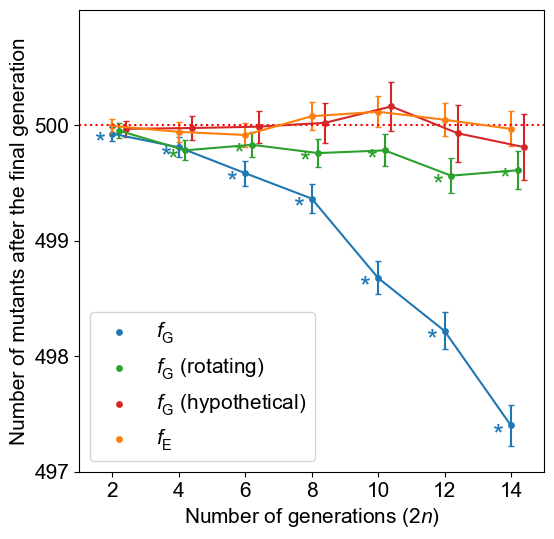

In [55]:
# 7 generations of w1/w2. Total of 14 generations
_N_ = 7

# Initial number of mutant copies
N_m_ini = 500

plt.subplots(figsize=[6,6])

N_m_list_list_dict = {'fG':N_m_list_list,
                      'fG_r':N_m_list_list_rotation,
                      'fE':N_m_list_list_e,
                      'fG_h':N_m_list_list_l}

label_dict = {'fG':'$\mathit{f}_{G}$',
              'fG_r':'$\mathit{f}_{G}$ (rotating)',
              'fE':'$\mathit{f}_{E}$',
              'fG_h':'$\mathit{f}_{G}$ (hypothetical)'}

color_dict = {'fG':'C0',
              'fG_r':'C2',
              'fE':'C1',
              'fG_h':'C3'}

offset_dict = {'fG':0,
               'fG_r':0.1,
               'fE':0,
               'fG_h':0.2}

# Plot results of all simulations
for mode in ['fG','fG_r','fG_h','fE']: 

    plt.scatter(x=np.array(range(1,_N_+1))+offset_dict[mode],
                y=list(map(np.mean,N_m_list_list_dict[mode]))[0:_N_],
                s=15,
                label=label_dict[mode],
                color=color_dict[mode])
    
    plt.errorbar(
        x=np.array(range(1,_N_+1))+offset_dict[mode],
        y=list(map(np.mean,N_m_list_list_dict[mode]))[0:_N_],
        yerr=np.array(list(map(stats.sem,N_m_list_list_dict[mode]))[0:_N_])*1.96,
        color=color_dict[mode],
        capsize=2
    )
    
    for i in range(0,_N_):
        z,p = stats.ttest_1samp(N_m_list_list_dict[mode][i],N_m_ini)
        if p < 0.05:
            plt.text(x=i+0.8+offset_dict[mode],y=-0.15+np.mean(N_m_list_list_dict[mode][i]),
                     s=f"*",size=20,ha='center',color = color_dict[mode])

plt.hlines(y=500,xmin=0.5,xmax=_N_+0.5,color='r',ls='dotted')
plt.xticks(ticks=range(1,_N_+1),labels=range(2,2*_N_+2,2))
plt.yticks(ticks=range(497,501),labels=range(497,501))
plt.xlim(0.5,_N_+0.5)
plt.ylim(497,501)
plt.xlabel('Number of generations ($2\mathit{n}$)')
plt.ylabel('Number of mutants after the final generation')
plt.legend()

#plt.savefig('Figure3_A.pdf',bbox_inches='tight',pad_inches=1)